# Natural Language Processing Project

In this NLP project I will be attempting to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews.

I will use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

I will read in the yelp.csv file and set it as a dataframe called yelp_df.**

In [2]:
yelp_df = pd.read_csv("yelp.csv")
yelp_df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [3]:
len(yelp_df)

10000

Checking the info and describe methods on yelp_df.

In [4]:
yelp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [5]:
yelp_df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


**I will now create a new column called "text length" which is the number of words in the text column.**

In [6]:
yelp_df.head(3)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0


In [7]:
yelp_df["text"]

0       My wife took me here on my birthday for breakf...
1       I have no idea why some people give bad review...
2       love the gyro plate. Rice is so good and I als...
3       Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4       General Manager Scott Petello is a good egg!!!...
                              ...                        
9995    First visit...Had lunch here today - used my G...
9996    Should be called house of deliciousness!\n\nI ...
9997    I recently visited Olive and Ivy for business ...
9998    My nephew just moved to Scottsdale recently so...
9999    4-5 locations.. all 4.5 star average.. I think...
Name: text, Length: 10000, dtype: object

In [8]:
yelp_df["text"].apply(len)

0        889
1       1345
2         76
3        419
4        469
        ... 
9995     668
9996     881
9997    1425
9998     880
9999     461
Name: text, Length: 10000, dtype: int64

In [9]:
yelp_df["text length"] = yelp_df["text"].apply(len)
yelp_df.head(3)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76


# EDA

I will use FacetGrid from the seaborn library to create a grid of 5 histograms of text length based off of the star ratings.

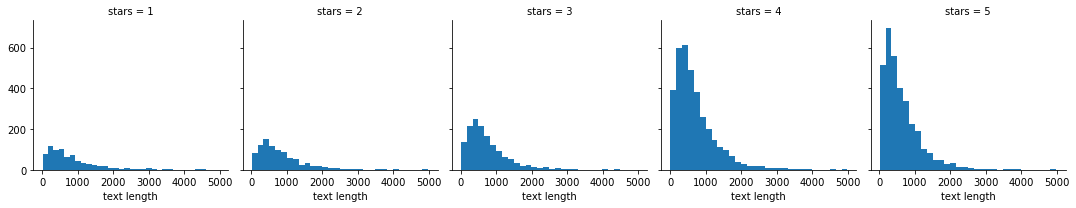

In [10]:
fg = sns.FacetGrid(data=yelp_df,col="stars")
fg.map(plt.hist,"text length",bins=30)

The distributions of text lengths seems to be the same for all star numbers. It looks like the amount of text reviews is skewed much more towards 4 and 5 star reviews. This may cause an imbalance as the data is not proportional within the dataset for all reviews.

I will now create a boxplot of text length for each star category.

<AxesSubplot:xlabel='stars', ylabel='text length'>

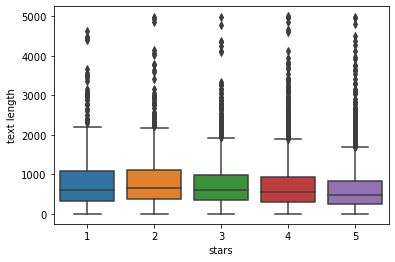

In [11]:
sns.boxplot(x="stars",y="text length",data=yelp_df)

It seems that 1 and 2 star reviews have higher text length but there are so many outliers represented by the dots above the bars of the boxplot that text length may not be a good feature.

I will now create a countplot of the number of occurrences for each type of star rating.

<AxesSubplot:xlabel='stars', ylabel='count'>

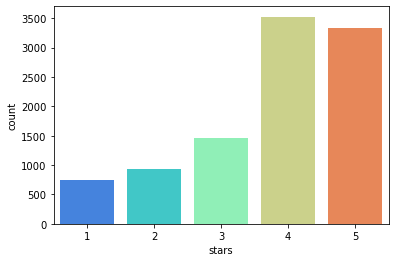

In [12]:
sns.countplot(x="stars",data=yelp_df,palette="rainbow")

This reflects what was seen in the 5 histograms above. There are higher amounts of 4 and 5 star reviews.

I will now group the stars column to get the average values for each of the star rating.

In [13]:
df1 = yelp_df.groupby("stars").mean()
df1

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


I will use the corr() method on that dataframe above (df1) to get the correlation between the numerical columns.

In [14]:
df1.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


I will use seaborn to create a heatmap based off that .corr() dataframe.

In [15]:
np.ones_like(df1.corr(), dtype=bool)

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [16]:
np.triu(np.ones_like(df1.corr(), dtype=bool))

array([[ True,  True,  True,  True],
       [False,  True,  True,  True],
       [False, False,  True,  True],
       [False, False, False,  True]])

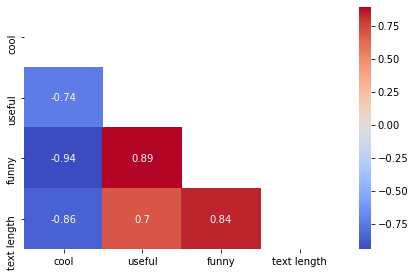

In [17]:
mask = np.triu(np.ones_like(df1.corr(), dtype=bool))

sns.heatmap(data=df1.corr(),mask=mask,cmap="coolwarm",annot=True)
plt.tight_layout()

I masked the heatmap since the information is duplicated and features perfectly correlate with themselves. Hence, the correlation of text length with text length is 1.

It seems that funny is highly correlated with the useful column (0.89) and this is inturn correlated with text length (0.84). There are also high negative correlations between cool, text length, funny and useful.

## NLP Classification

To make things a little easier, I will go ahead and only grab reviews that were either 1 star or 5 stars.

I will create a new dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.

In [18]:
yelp_df.head(3)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76


In [19]:
yelp_class = yelp_df[(yelp_df["stars"] == 1) | (yelp_df["stars"] == 5)]
yelp_class

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565
...,...,...,...,...,...,...,...,...,...,...,...
9990,R8VwdLyvsp9iybNqRvm94g,2011-10-03,pcEeHdAJPoFNF23es0kKWg,5,Yes I do rock the hipster joints. I dig this ...,review,b92Y3tyWTQQZ5FLifex62Q,1,1,1,263
9991,WJ5mq4EiWYAA4Vif0xDfdg,2011-12-05,EuHX-39FR7tyyG1ElvN1Jw,5,Only 4 stars? \n\n(A few notes: The folks that...,review,hTau-iNZFwoNsPCaiIUTEA,1,1,0,908
9992,f96lWMIAUhYIYy9gOktivQ,2009-03-10,YF17z7HWlMj6aezZc-pVEw,5,I'm not normally one to jump at reviewing a ch...,review,W_QXYA7A0IhMrvbckz7eVg,2,3,2,1326
9994,L3BSpFvxcNf3T_teitgt6A,2012-03-19,0nxb1gIGFgk3WbC5zwhKZg,5,Let's see...what is there NOT to like about Su...,review,OzOZv-Knlw3oz9K5Kh5S6A,1,2,1,1968


** Create two objects X and y. X will be the 'text' column of yelp_class and y will be the 'stars' column of yelp_class. (Your features and target/labels)**

In [20]:
yelp_class.info()

# there are only 4,086 columns now

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4086 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  4086 non-null   object
 1   date         4086 non-null   object
 2   review_id    4086 non-null   object
 3   stars        4086 non-null   int64 
 4   text         4086 non-null   object
 5   type         4086 non-null   object
 6   user_id      4086 non-null   object
 7   cool         4086 non-null   int64 
 8   useful       4086 non-null   int64 
 9   funny        4086 non-null   int64 
 10  text length  4086 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 383.1+ KB


## Train Test Split

I will split the data into training and testing data.

In [21]:
X = yelp_class["text"]
X

0       My wife took me here on my birthday for breakf...
1       I have no idea why some people give bad review...
3       Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4       General Manager Scott Petello is a good egg!!!...
6       Drop what you're doing and drive here. After I...
                              ...                        
9990    Yes I do rock the hipster joints.  I dig this ...
9991    Only 4 stars? \n\n(A few notes: The folks that...
9992    I'm not normally one to jump at reviewing a ch...
9994    Let's see...what is there NOT to like about Su...
9999    4-5 locations.. all 4.5 star average.. I think...
Name: text, Length: 4086, dtype: object

In [22]:
y = yelp_class["stars"] 
y

0       5
1       5
3       5
4       5
6       5
       ..
9990    5
9991    5
9992    5
9994    5
9999    5
Name: stars, Length: 4086, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=101)

In [25]:
X_train

3608    I have found my new favorite sushi spot.\n\nI ...
2397    I have been exploring more of the park recentl...
6066    I've been taking mine and my family's cars to ...
7366    Absolutely waste of time & space is this estab...
5888    Ive been eating here more and more often latel...
                              ...                        
3902    The best tacos in the city, amazing veggies, a...
9570    This is the best buffet in Az. HUGE variety fr...
3333    We went here for my wife's birthday, and it's ...
3781    Loved it. Pulled pork & pulled chicken, bbq sa...
2071    I was inspired to visit Casella's after a cowo...
Name: text, Length: 2860, dtype: object

In [26]:
X_test

2414    Japanese chefs, top notch sashimi, affordable ...
3552    The staff of this "establishment" are some of ...
5364    I love Jimmy Johns.  It is WAY better than Sub...
1222    Honestly, this is the best pizza that I've had...
5011                   Poor service-small portions-pricey
                              ...                        
5627    20% off with a Yelp check in? SCORE! \n\nThey ...
862     An oasis of little kid fun in Phoenix, we hadn...
5307    If I could give it more than 5, I would.  Swee...
9420    This is a brand new delicatessen who's grand o...
1455    I've been going to Lake Pleasant Dentistry for...
Name: text, Length: 1226, dtype: object

In [27]:
y_train

3608    5
2397    5
6066    5
7366    1
5888    5
       ..
3902    5
9570    5
3333    5
3781    5
2071    5
Name: stars, Length: 2860, dtype: int64

In [28]:
y_test

2414    5
3552    1
5364    5
1222    5
5011    1
       ..
5627    5
862     5
5307    5
9420    5
1455    5
Name: stars, Length: 1226, dtype: int64

**I will import CountVectorizer and create a CountVectorizer object.**

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
cv_obj = CountVectorizer(analyzer="word")

** Use the fit_transform method on the CountVectorizer object and pass in X (the 'text' column). Save this result by overwriting X.**

In [31]:
cv_obj.fit(X_train)

CountVectorizer()

In [32]:
X_train = cv_obj.transform(X_train)
X_train

<2860x16233 sparse matrix of type '<class 'numpy.int64'>'
	with 221059 stored elements in Compressed Sparse Row format>

In [33]:
X_test = cv_obj.transform(X_test)
X_test

<1226x16233 sparse matrix of type '<class 'numpy.int64'>'
	with 92912 stored elements in Compressed Sparse Row format>

In [34]:
print(X_train)
# I transformed a given text into a vector on the basis of the frequency (count) of each word

  (0, 461)	1
  (0, 653)	1
  (0, 695)	1
  (0, 757)	1
  (0, 768)	1
  (0, 779)	7
  (0, 843)	1
  (0, 895)	1
  (0, 957)	1
  (0, 958)	1
  (0, 1034)	1
  (0, 1176)	2
  (0, 1455)	1
  (0, 1507)	1
  (0, 1598)	1
  (0, 1679)	1
  (0, 1833)	1
  (0, 2206)	1
  (0, 2235)	1
  (0, 2236)	3
  (0, 2269)	2
  (0, 2272)	1
  (0, 2316)	1
  (0, 2333)	1
  (0, 2351)	2
  :	:
  (2859, 14636)	1
  (2859, 14676)	8
  (2859, 14685)	1
  (2859, 14701)	1
  (2859, 14727)	1
  (2859, 14889)	1
  (2859, 14984)	1
  (2859, 14994)	2
  (2859, 15383)	1
  (2859, 15443)	1
  (2859, 15515)	1
  (2859, 15519)	1
  (2859, 15604)	1
  (2859, 15605)	2
  (2859, 15644)	1
  (2859, 15661)	13
  (2859, 15737)	2
  (2859, 15760)	1
  (2859, 15787)	1
  (2859, 15801)	1
  (2859, 15809)	1
  (2859, 16114)	1
  (2859, 16117)	1
  (2859, 16140)	3
  (2859, 16178)	1


In [35]:
cv_obj.vocabulary_

{'have': 6774,
 'found': 5861,
 'my': 9531,
 'new': 9674,
 'favorite': 5418,
 'sushi': 14084,
 'spot': 13538,
 'wish': 15933,
 'it': 7709,
 'was': 15661,
 'closer': 2990,
 'to': 14676,
 'tempe': 14387,
 'but': 2236,
 'worth': 16015,
 'the': 14482,
 'drive': 4616,
 'you': 16140,
 'can': 2351,
 'tell': 14381,
 'by': 2269,
 'their': 14490,
 'menu': 9086,
 'that': 14477,
 'hana': 6666,
 'strives': 13855,
 'be': 1455,
 'an': 768,
 'authentic': 1176,
 'japanese': 7768,
 'restaurant': 12002,
 'as': 1034,
 'opposed': 10048,
 'sake': 12359,
 'bomber': 1833,
 'joint': 7849,
 'only': 10009,
 'has': 6750,
 'food': 5778,
 'so': 13263,
 'they': 14516,
 'call': 2316,
 'themselves': 14497,
 'know': 8075,
 'kind': 8032,
 'phoenix': 10672,
 'area': 958,
 'is': 7695,
 'plagued': 10811,
 'with': 15938,
 'them': 14493,
 'byob': 2272,
 'and': 779,
 'there': 14507,
 'are': 957,
 'few': 5500,
 'ridiculous': 12101,
 'fusion': 6059,
 'rolls': 12206,
 'on': 10000,
 'most': 9416,
 'of': 9933,
 'real': 11628,
 'fi

In [36]:
len(cv_obj.vocabulary_)

# unique words

16233

In [37]:
cv_obj.vocabulary_["my"]

# this is a dictionary with key = "my" and value = 9531

9531

In [38]:
cv_obj.get_feature_names()

# the names are the individual words in the sparse matrix.

['00',
 '000',
 '00a',
 '00am',
 '00pm',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '09',
 '0buxoc0crqjpvkezo3bqog',
 '0l',
 '10',
 '100',
 '1000',
 '1000x',
 '1001',
 '100s',
 '100th',
 '101',
 '102',
 '1030',
 '105',
 '1070',
 '108',
 '109',
 '10am',
 '10ish',
 '10min',
 '10mins',
 '10pm',
 '10th',
 '10x',
 '10yo',
 '11',
 '110',
 '1100',
 '111th',
 '112',
 '115',
 '115th',
 '116',
 '11a',
 '11am',
 '11pm',
 '12',
 '120',
 '128i',
 '129',
 '12am',
 '12oz',
 '12pm',
 '12th',
 '13',
 '1300',
 '13331',
 '13th',
 '14',
 '140',
 '147',
 '14lbs',
 '15',
 '150',
 '1500',
 '157',
 '15mins',
 '15pm',
 '16',
 '160',
 '165',
 '169',
 '16th',
 '17',
 '17p',
 '17th',
 '18',
 '180',
 '1800',
 '1895',
 '19',
 '1913',
 '1928',
 '1930s',
 '1952',
 '1970',
 '1980',
 '1980s',
 '1987',
 '1990s',
 '1992',
 '1995',
 '1996',
 '1998',
 '1999',
 '19th',
 '1cent',
 '1k',
 '1p',
 '1pm',
 '1st',
 '20',
 '200',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '200lbs',
 '2010',
 '2

In [39]:
len(cv_obj.get_feature_names())

# check length to confirm this

16233

In [40]:
cv_obj.get_feature_names()[9531]

'my'

In [41]:
X_train.shape

(2860, 16233)

In [42]:
X_train.nnz

# non zero occurences (sparse matrix only)

221059

# Using Text Processing

I will import TfidfTransformer from sklearn.

In [43]:
from sklearn.feature_extraction.text import TfidfTransformer

In [44]:
tfidf_obj = TfidfTransformer()

In [45]:
X_train = tfidf_obj.fit_transform(X_train)
X_train

<2860x16233 sparse matrix of type '<class 'numpy.float64'>'
	with 221059 stored elements in Compressed Sparse Row format>

In [46]:
X_test = tfidf_obj.transform(X_test)
X_test

<1226x16233 sparse matrix of type '<class 'numpy.float64'>'
	with 92912 stored elements in Compressed Sparse Row format>

## Training a Model

I will import MultinomialNB and create an instance of the estimator and call is mnb_obj.

In [47]:
from sklearn.naive_bayes import MultinomialNB

In [48]:
mnb_obj = MultinomialNB()

In [49]:
mnb_obj.fit(X_train,y_train)

MultinomialNB()

**Please note that the same steps above could have been done using a pipeline for simplicity.**

In [50]:
from sklearn.pipeline import Pipeline

In [51]:
pipe_obj = Pipeline([
    ("cv_obj1",CountVectorizer(analyzer="word")),
    ("tfidf_obj1",TfidfTransformer()),
    ("mnb_obj1",MultinomialNB())    
])

## Predictions and Evaluations

I will use the predict method off of mnb_obj to predict labels from X_test.**

In [52]:
predictions = mnb_obj.predict(X_test)
predictions

array([5, 5, 5, ..., 5, 5, 5], dtype=int64)

I will create a confusion matrix and classification report using these predictions and y_test.

In [53]:
from sklearn.metrics import classification_report,confusion_matrix

In [54]:
print(confusion_matrix(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))

[[  0 228]
 [  0 998]]


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



C:\Users\issam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


It seems that the model did really bad in predicting the 1 star reviews. This could be due to a variety of reason. But, the main ones are the way the model was built and the umbalanced dataset which was used to train the model.

## Using the Pipeline to create a new model

In [55]:
yelp_class.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565


In [56]:
X = yelp_class["text"]
X

# reassign X

0       My wife took me here on my birthday for breakf...
1       I have no idea why some people give bad review...
3       Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4       General Manager Scott Petello is a good egg!!!...
6       Drop what you're doing and drive here. After I...
                              ...                        
9990    Yes I do rock the hipster joints.  I dig this ...
9991    Only 4 stars? \n\n(A few notes: The folks that...
9992    I'm not normally one to jump at reviewing a ch...
9994    Let's see...what is there NOT to like about Su...
9999    4-5 locations.. all 4.5 star average.. I think...
Name: text, Length: 4086, dtype: object

In [57]:
y = yelp_class["stars"]
y

# reassign y

0       5
1       5
3       5
4       5
6       5
       ..
9990    5
9991    5
9992    5
9994    5
9999    5
Name: stars, Length: 4086, dtype: int64

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=101)

# new train test split

In [59]:
from sklearn.pipeline import Pipeline

In [60]:
pipe_obj = Pipeline([
    ("cv_obj1",CountVectorizer(analyzer="word")),
    ("mnb_obj1",MultinomialNB())    
])

Now I will fit the pipeline to the training data.

In [61]:
pipe_obj.fit(X_train,y_train)

Pipeline(steps=[('cv_obj1', CountVectorizer()), ('mnb_obj1', MultinomialNB())])

### Predictions and Evaluation

Now I will use the pipeline to predict from the X_test and create a classification report and confusion matrix.

In [62]:
pred1 = pipe_obj.predict(X_test)
pred1

array([5, 1, 5, ..., 5, 5, 5], dtype=int64)

In [63]:
print(confusion_matrix(y_test,pred1))
print("\n")
print(classification_report(y_test,pred1))

[[155  73]
 [ 15 983]]


              precision    recall  f1-score   support

           1       0.91      0.68      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.92      0.83      0.87      1226
weighted avg       0.93      0.93      0.92      1226



Looks like Tf-Idf actually made things worse by implementing it in the first model. The second model performed much better had a higher accuracy, precision, recall and f1-score. It successfully classified the 1 and 5 star reviews based on the text of the review.